In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def loadDataH5():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 

In [3]:
def showGraph(Histroy, epochs):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), Histroy.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), Histroy.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

In [4]:
def trainModel(model, epochs, trainX, trainY, testX, testY):

    print (trainX.shape,trainY.shape)
    print (testX.shape,testY.shape)
    opt = tf.keras.optimizers.SGD(lr=0.01)
    print (model.summary())
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
        metrics=["accuracy"])
    print("Training network...")
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
        batch_size=32, epochs=epochs)
    return H

# Implement a baseline CNN, which contains just a single convolutional layer, single pooling layer, fully connected layer and softmax layer.
# Increase the number of layers in your CNN (the number of convolutional and pooling layers). You should implement at least three different CNN configurations (not including the baseline). In your report show the impact on the validation and training accuracy/loss values (inclusive of the baseline case). Compare and contrast the performance of your models in your report. 

In [5]:
trainX, trainY, valX, valY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [6]:
input_shape = trainX.shape[1:]
classes = 17
epochs = 100

In [7]:
print(input_shape)

(128, 128, 3)


In [8]:
baseline_CNN = tf.keras.Sequential() 
baseline_CNN.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=input_shape, activation='relu'))
baseline_CNN.add(MaxPooling2D(pool_size=(2,2)))
baseline_CNN.add(tf.keras.layers.Flatten())
baseline_CNN.add(Dense(64, activation = "relu")) # making the model fully connected
baseline_CNN.add(tf.keras.layers.Dense(classes, activation='softmax'))

In [9]:
# history = trainModel(baseline_CNN, epochs, trainX, trainY, valX, valY)
# showGraph(history, epochs)

In [10]:
CNN2 = tf.keras.Sequential() 
CNN2.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=input_shape, activation='relu'))
CNN2.add(MaxPooling2D(pool_size=(2,2)))

CNN2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN2.add(MaxPooling2D(pool_size=(2,2)))    
    
CNN2.add(tf.keras.layers.Flatten())
CNN2.add(Dense(256, activation = "relu")) # making the model fully connected
CNN2.add(tf.keras.layers.Dense(classes, activation='softmax'))

In [11]:
# history = trainModel(CNN2, epochs, trainX, trainY, valX, valY)
# showGraph(history, epochs)

In [12]:
CNN3 = tf.keras.Sequential() 
CNN3.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=input_shape, activation='relu'))
CNN3.add(MaxPooling2D(pool_size=(2,2)))

CNN3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN3.add(MaxPooling2D(pool_size=(2,2)))    

CNN3.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN3.add(MaxPooling2D(pool_size=(2,2)))    


CNN3.add(tf.keras.layers.Flatten())
CNN3.add(Dense(512, activation = "relu")) # making the model fully connected
CNN3.add(tf.keras.layers.Dense(classes, activation='softmax'))

In [13]:
# history = trainModel(CNN3, epochs, trainX, trainY, valX, valY)
# showGraph(history, epochs)

In [14]:
CNN4 = tf.keras.Sequential() 
CNN4.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=input_shape, activation='relu'))
CNN4.add(MaxPooling2D(pool_size=(2,2)))

CNN4.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN4.add(MaxPooling2D(pool_size=(2,2)))    

CNN4.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN4.add(MaxPooling2D(pool_size=(2,2))) 

CNN4.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN4.add(MaxPooling2D(pool_size=(2,2))) 
    
CNN4.add(tf.keras.layers.Flatten())
CNN4.add(Dense(1024, activation = "relu")) # making the model fully connected
CNN4.add(tf.keras.layers.Dense(classes, activation='softmax'))

In [15]:
# history = trainModel(CNN4, epochs, trainX, trainY, valX, valY)
# showGraph(history, epochs)

# Investigate the implementation of data augmentation techniques for two of the above models (please select the two deepest models). 
# In your report describe the impact(if any), of applying data augmentation on these models. 
# How do you explain the impact of data augmentation? Does the selection of methods used as part of your data augmentation (such as cropping, flipping etc) have an influence on accuracy? 

In [16]:
def trainModelAug(model, datagen, epochs, trainX, trainY, testX, testY):

    print (trainX.shape,trainY.shape)
    print (testX.shape,testY.shape)
    opt = tf.keras.optimizers.SGD(lr=0.01)
    print (model.summary())
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
        metrics=["accuracy"])
    print("Training network...")
    H = model.fit_generator(
                      datagen.flow(trainX, trainY,batch_size=32),
                      epochs=epochs,
                      validation_data=(valX,valY))
    return H

In [17]:
trainX, trainY, testX, testY = loadDataH5()
input_shape = trainX.shape[1:]
classes = 17
epochs = 100

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [18]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_datagen.fit(trainX)

In [19]:
history = trainModelAug(CNN3, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

In [20]:
history = trainModelAug(CNN4, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

# How do you explain the impact of data augmentation? Does the selection of methods used as part of your data augmentation (such as cropping, flipping etc) have an influence on accuracy? 

# Adding more aggresive data augmentation parameters on the deepest model

In [21]:
train_datagen = ImageDataGenerator(rotation_range=90, 
                                   width_shift_range=[0.1,0.5],
                                   height_shift_range=[0.1,0.5], 
                                   shear_range=0.2,
                                   zoom_range=[0.1,0.5],
                                   horizontal_flip=True,
                                   brightness_range=[0.2,0.5],
                                   fill_mode="nearest")
train_datagen.fit(trainX)

In [22]:
history = trainModelAug(CNN4, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

In [23]:
train_datagen = ImageDataGenerator(rotation_range=90, 
                                   width_shift_range=[0.1,0.5],
                                   height_shift_range=[0.1,0.5], 
                                   shear_range=0.2,
                                   zoom_range=[0.1,0.5],
                                   horizontal_flip=True,
                                   brightness_range=[0.2,0.5],
                                   fill_mode="nearest")
train_datagen.fit(trainX)

In [24]:
history = trainModelAug(CNN3, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

# Removed few data augmentation parameters on the deepest model

In [25]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=[0.1,1],
                                   horizontal_flip=True,
                                   brightness_range=[0.2,1.0],
                                   fill_mode="nearest")
train_datagen.fit(trainX)

In [26]:
history = trainModelAug(CNN4, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

# With 3 layers

In [ ]:
history = trainModelAug(CNN3, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________


# Making data augmentation more subtle

In [26]:
train_datagen = ImageDataGenerator(rotation_range=45,
                                   horizontal_flip=True,
                                   brightness_range=[0.2,1.0])
train_datagen.fit(trainX)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________


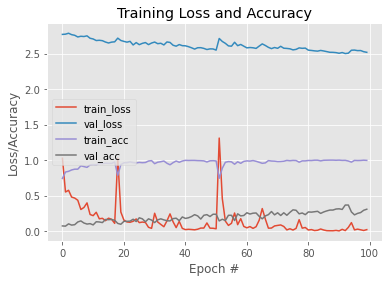

In [27]:
history = trainModelAug(CNN4, train_datagen, 100, trainX, trainY, testX, testY)
showGraph(history, epochs)